In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random.seed(5)
decathlon = pd.read_csv("decathlon.csv")

In [6]:
decathlon.head(10)

,Unnamed: 0,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
7,McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.1,9,7802,Decastar
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.1,10,7733,Decastar


In [8]:
y = decathlon['Points']
X = decathlon[['100m','Long.jump','Shot.put','High.jump','400m','110m.hurdle','Discus','Pole.vault','Javeline','1500m']]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
params = {
    "n_estimators":500,
    "max_depth":4,
    "min_samples_split":5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [12]:
scaller = StandardScaler()
scaller.fit(X_train)
X_train = scaller.transform(X_train)
X_test = scaller.transform(X_test)

In [13]:
pca = decomposition.PCA()
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [21]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train,y_train)

mse = mean_squared_error(y_test,reg.predict(X_test))
print(f"The mean squared error on test set: {mse:.4f}")

The mean squared error on test set: 7983.4006


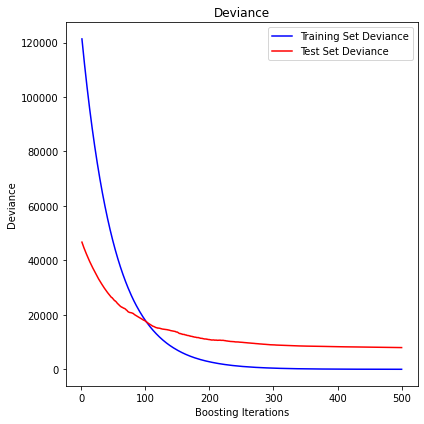

In [26]:
test_score = np.zeros((params["n_estimators"],),dtype=np.float64)
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test,y_pred)

fig = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label = "Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score,"r-",label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()